In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Using sensor data from devices deployed in NYC and correlative data available from NYC Open Data,
your assignment is to identify patterns and anomalies in environmental data, and find potential causal
relationships between these indicators and the built environment. Air quality (particulate matter) and
noise data have been posted to NYUClasses, along with locations of the devices taking the readings. 

In [3]:
sensor = pd.read_csv('LuxDustNoise_summarized_4hour_0719.csv')

1. Clean and plot the data for the individual sensors provided;
2. Describe the daily patterns that emerge;
3. Identify anomalous activity;
4. Link the sensor data back to city administrative records to identify possible correlations or
causal relationships.
-For air quality, you should examine the correlation between particular matter concentrations
and temperature, humidity, and land use.
-For noise, you should analyze the relationship (If any) between noise level readings, 311
complaints about noise, and land use.

In [5]:
sensor.head()

,dt,sensor,lux,con,spl
0,2016-06-21 00:00:00,sensor_0,0.0,2834.03125,66.308479
1,2016-06-21 00:00:00,sensor_2,0.0,1691.99625,70.375943
2,2016-06-21 00:00:00,sensor_3,0.0,1686.44125,76.235738
3,2016-06-21 00:00:00,sensor_4,0.0,2324.65875,70.652334
4,2016-06-21 04:00:00,sensor_0,3213.5,2748.28875,81.467436


In [4]:
sensor.dt = pd.to_datetime(sensor.dt)

sensor_0 : RHI roof (at corner of Hicks and W 9th streets, elevation approx. 8m) - 767 Hicks St, Brooklyn, NY 11231 

sensor_3 : RHI entrance (on Hicks street at street level) - 767 Hicks St, Brooklyn, NY 11231


sensor_2 : TechLab (at ground level) - 106 Ferris St

sensor_4 : PioneerWorks roof (elevation approx. 15m) - 159 Pioneer St, Brooklyn, NY 11231

In [5]:
sensor_1 = sensor[sensor.sensor == 'sensor_0']
sensor_2 = sensor[sensor.sensor == 'sensor_2']
sensor_3 = sensor[sensor.sensor == 'sensor_3']
sensor_4 = sensor[sensor.sensor == 'sensor_4']

sensor data for luminosity (in Lux), particulate concentration (particle count per 0.01 cubic feet), and noise (sound pressure level in dB). The dataset includes readings for four (4) sensors in Red Hook from June 2016. 

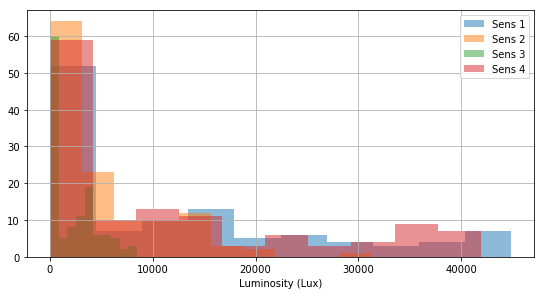

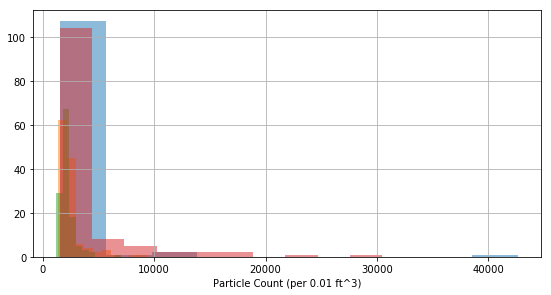

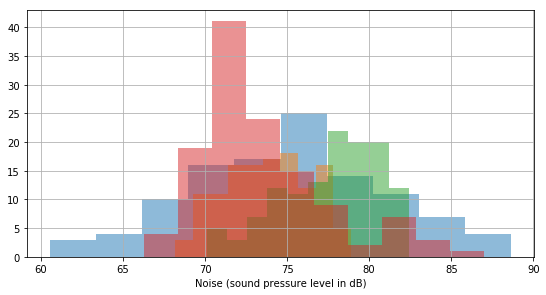

In [6]:
plt.figure(figsize = (20, 10))
subplot (221)
sensor_1['lux'].hist(alpha=.5, label='Sens 1')
sensor_2['lux'].hist(alpha=.5, label='Sens 2')
sensor_3['lux'].hist(alpha=.5, label='Sens 3')
sensor_4['lux'].hist(alpha=.5, label='Sens 4')
plt.xlabel('Luminosity (Lux)')
plt.legend()

plt.figure(figsize = (20, 10))
subplot (221)
sensor_1['con'].hist(alpha=.5, label='Sens 1')
sensor_2['con'].hist(alpha=.5, label='Sens 2')
sensor_3['con'].hist(alpha=.5, label='Sens 3')
sensor_4['con'].hist(alpha=.5, label='Sens 4')
plt.xlabel('Particle Count (per 0.01 ft^3)')

plt.figure(figsize = (20, 10))
subplot (221)
sensor_1['spl'].hist(alpha=.5, label='Sens 1')
sensor_2['spl'].hist(alpha=.5, label='Sens 2')
sensor_3['spl'].hist(alpha=.5, label='Sens 3')
sensor_4['spl'].hist(alpha=.5, label='Sens 4')
plt.xlabel("Noise (sound pressure level in dB)")

In [7]:
print ("Luminosity (Lux) Mean, StDev, N: ", sensor['lux'].mean(), ", ", sensor['lux'].std()\
      , ", ",sensor['lux'].count())
print ("Particle Count (per 0.01 ft^3) Mean, StDev, N: ", sensor['con'].mean(),\
       ", ", sensor['con'].std(), ", ", sensor['con'].count())
print ("Noise (Sound Pressure Level in dB) Mean, StDev, N: ", sensor['spl'].mean(),\
       ", ", sensor['spl'].std(), ", ",sensor['spl'].count())

Luminosity (Lux) Mean, StDev, N:  7472.457297178333 ,  10712.648715555339 ,  486
Particle Count (per 0.01 ft^3) Mean, StDev, N:  2941.5346418528375 ,  3010.6979497507728 ,  486
Noise (Sound Pressure Level in dB) Mean, StDev, N:  74.99483128944007 ,  4.318853303286055 ,  486


# Normalize sensor data by indexing
Since each variable (luminosity, noice, and air quality) are each measured on four different sensors, each in a different location, the data needs to be normalized to allow for comparisions across the four locations.  To do this, the indexing method was used: each value is divided by the value at the starting date, and then multiplied by 100.
Source: <https://www.dallasfed.org/research/basics/indexing.aspx>

In [25]:
# Take this out later
sensors = [1,2,3,4]
sens = []
for i in sensors:
    i = str(i)
    sens.append('sensor_'+i)
print (sens)

['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4']


In [9]:
varbls = ['lux', 'con', 'spl']

In [10]:
def indexing_norm (df, l):
    t_0 = df[(l)].mean()
    indexed_values = df[(l)] / t_0
    return indexed_values

In [11]:
for i in varbls:
    sensor_1[(i+'_indx')] = indexing_norm(sensor_1, i)
    sensor_2[(i+'_indx')] = indexing_norm(sensor_2, i)
    sensor_3[(i+'_indx')] = indexing_norm(sensor_3, i)
    sensor_4[(i+'_indx')] = indexing_norm(sensor_4, i)

/Users/baileygriswold/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/baileygriswold/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/baileygriswold/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

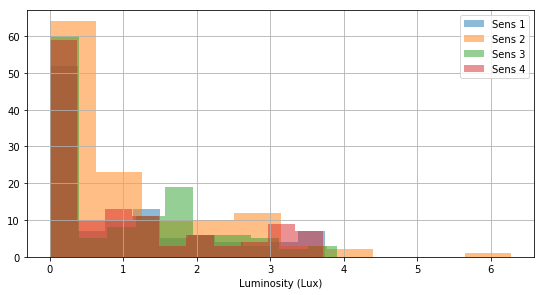

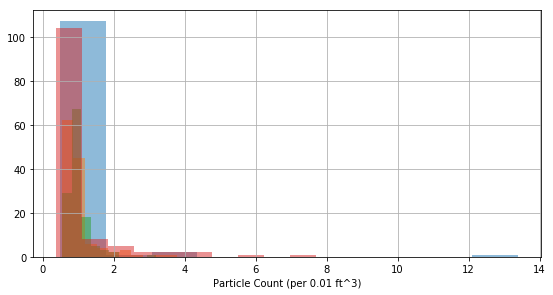

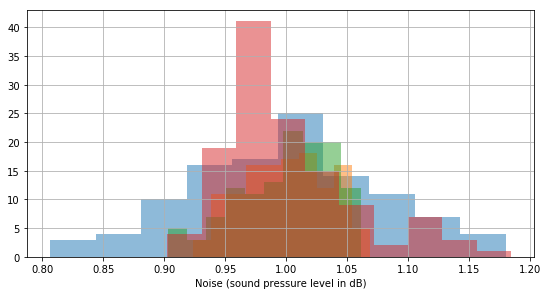

In [12]:
plt.figure(figsize = (20, 10))
subplot (221)
sensor_1['lux_indx'].hist(alpha=.5, label='Sens 1')
sensor_2['lux_indx'].hist(alpha=.5, label='Sens 2')
sensor_3['lux_indx'].hist(alpha=.5, label='Sens 3')
sensor_4['lux_indx'].hist(alpha=.5, label='Sens 4')
plt.xlabel('Luminosity (Lux)')
plt.legend()

plt.figure(figsize = (20, 10))
subplot (221)
sensor_1['con_indx'].hist(alpha=.5, label='Sens 1')
sensor_2['con_indx'].hist(alpha=.5, label='Sens 2')
sensor_3['con_indx'].hist(alpha=.5, label='Sens 3')
sensor_4['con_indx'].hist(alpha=.5, label='Sens 4')
plt.xlabel('Particle Count (per 0.01 ft^3)')

plt.figure(figsize = (20, 10))
subplot (221)
sensor_1['spl_indx'].hist(alpha=.5, label='Sens 1')
sensor_2['spl_indx'].hist(alpha=.5, label='Sens 2')
sensor_3['spl_indx'].hist(alpha=.5, label='Sens 3')
sensor_4['spl_indx'].hist(alpha=.5, label='Sens 4')
plt.xlabel("Noise (sound pressure level in dB)")

### Describe the daily patterns that emerge

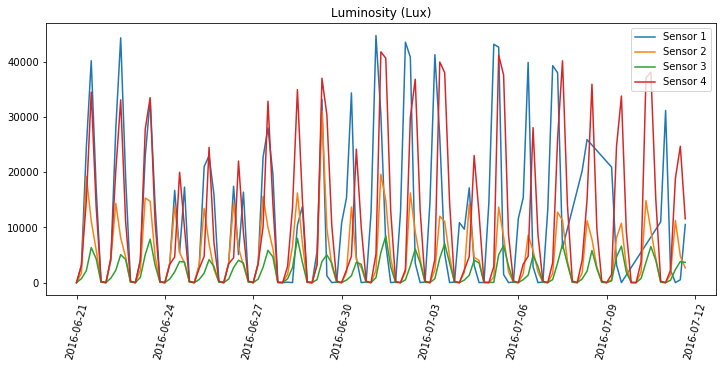

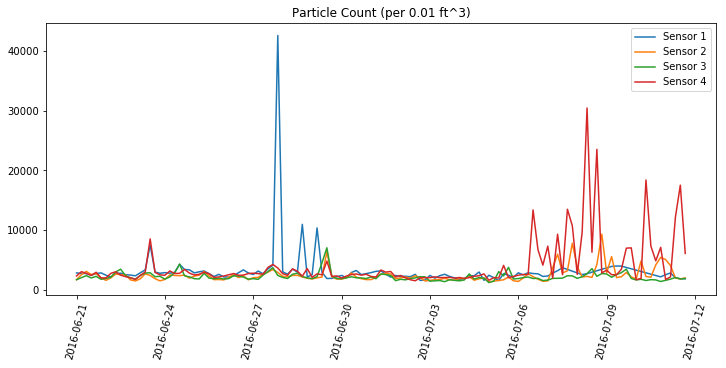

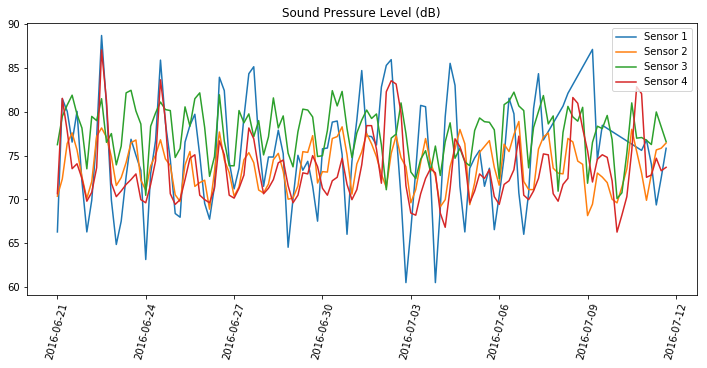

In [13]:
fig = plt.figure(figsize = (12, 5))
plt.plot(sensor_1.dt, sensor_1['lux'], label=('Sensor 1'))
plt.plot(sensor_2.dt, sensor_2['lux'], label=('Sensor 2'))
plt.plot(sensor_3.dt, sensor_3['lux'], label=('Sensor 3'))
plt.plot(sensor_4.dt, sensor_4['lux'], label=('Sensor 4'))
plt.title('Luminosity (Lux)')
plt.xticks(rotation=75, fontsize=10)
plt.legend(loc='best')

fig = plt.figure(figsize = (12, 5))
plt.plot(sensor_1.dt, sensor_1['con'], label=('Sensor 1'))
plt.plot(sensor_2.dt, sensor_2['con'], label=('Sensor 2'))
plt.plot(sensor_3.dt, sensor_3['con'], label=('Sensor 3'))
plt.plot(sensor_4.dt, sensor_4['con'], label=('Sensor 4'))
plt.title('Particle Count (per 0.01 ft^3)')
plt.xticks(rotation=75, fontsize=10)
plt.legend(loc='best')

fig = plt.figure(figsize = (12, 5))
plt.plot(sensor_1.dt, sensor_1['spl'], label=('Sensor 1'))
plt.plot(sensor_2.dt, sensor_2['spl'], label=('Sensor 2'))
plt.plot(sensor_3.dt, sensor_3['spl'], label=('Sensor 3'))
plt.plot(sensor_4.dt, sensor_4['spl'], label=('Sensor 4'))
plt.title('Sound Pressure Level (dB)')
plt.xticks(rotation=75, fontsize=10)
plt.legend(loc='best')

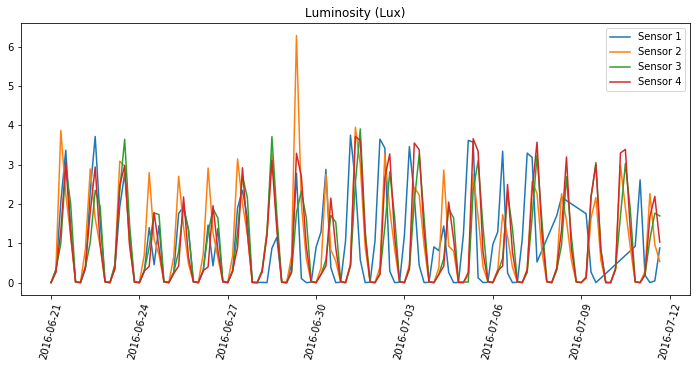

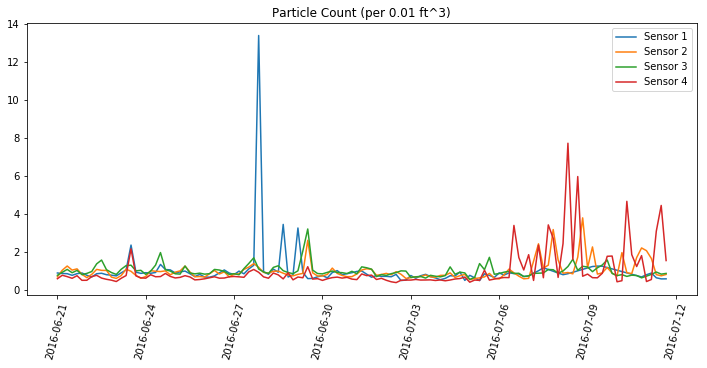

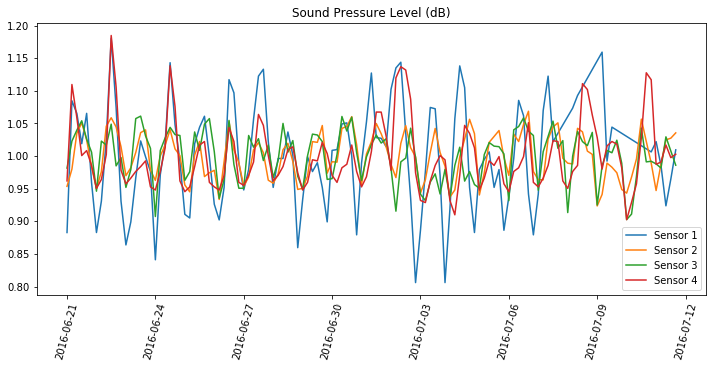

In [14]:
fig = plt.figure(figsize = (12, 5))
plt.plot(sensor_1.dt, sensor_1['lux_indx'], label=('Sensor 1'))
plt.plot(sensor_2.dt, sensor_2['lux_indx'], label=('Sensor 2'))
plt.plot(sensor_3.dt, sensor_3['lux_indx'], label=('Sensor 3'))
plt.plot(sensor_4.dt, sensor_4['lux_indx'], label=('Sensor 4'))
plt.title('Luminosity (Lux)')
plt.xticks(rotation=75, fontsize=10)
plt.legend(loc='best')

fig = plt.figure(figsize = (12, 5))
plt.plot(sensor_1.dt, sensor_1['con_indx'], label=('Sensor 1'))
plt.plot(sensor_2.dt, sensor_2['con_indx'], label=('Sensor 2'))
plt.plot(sensor_3.dt, sensor_3['con_indx'], label=('Sensor 3'))
plt.plot(sensor_4.dt, sensor_4['con_indx'], label=('Sensor 4'))
plt.title('Particle Count (per 0.01 ft^3)')
plt.xticks(rotation=75, fontsize=10)
plt.legend(loc='best')

fig = plt.figure(figsize = (12, 5))
plt.plot(sensor_1.dt, sensor_1['spl_indx'], label=('Sensor 1'))
plt.plot(sensor_2.dt, sensor_2['spl_indx'], label=('Sensor 2'))
plt.plot(sensor_3.dt, sensor_3['spl_indx'], label=('Sensor 3'))
plt.plot(sensor_4.dt, sensor_4['spl_indx'], label=('Sensor 4'))
plt.title('Sound Pressure Level (dB)')
plt.xticks(rotation=75, fontsize=10)
plt.legend(loc='best')

(array([ -2.5,   0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,
         20. ,  22.5]), <a list of 11 Text xticklabel objects>)

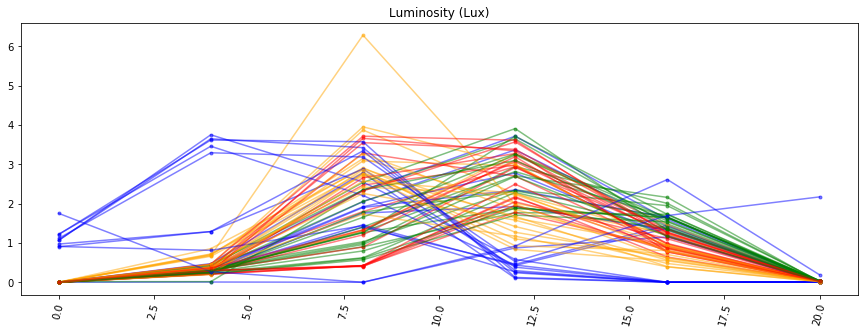

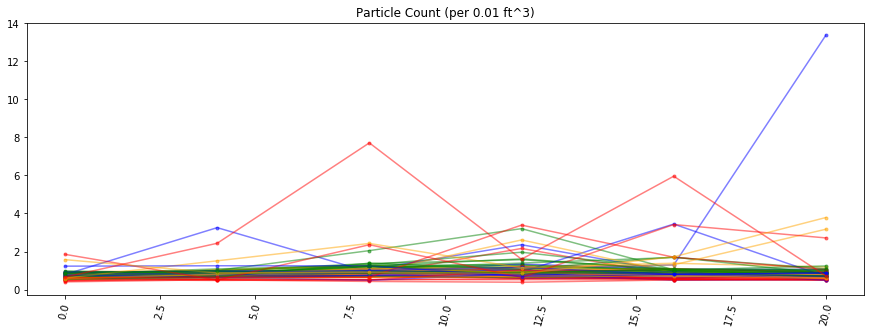

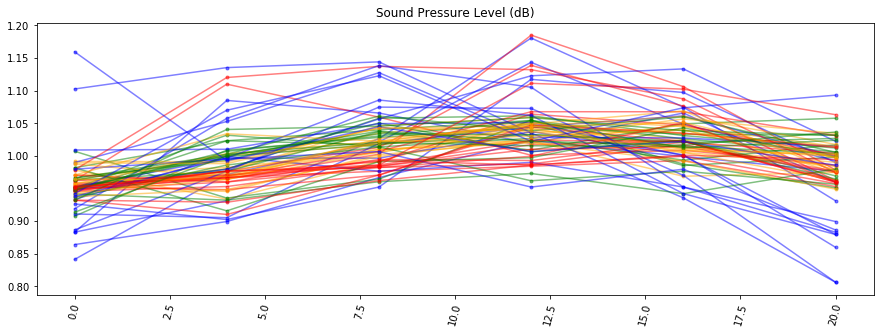

In [177]:
fig = plt.figure(figsize = (15, 5))
start = 0
end = 6
x = [0,4,8,12,16,20]
for i in arange(18):
    y = sensor_1['lux_indx'].tolist()
    plt.plot(x,y[start:end], label=('Sensor 1'), alpha=.5, color = 'b', marker='.', linestyle='-')
    y = sensor_2['lux_indx'].tolist()
    plt.plot(x,y[start:end], label=('Sensor 2'), alpha=.5, color = 'orange', marker='.', linestyle='-')
    y = sensor_3['lux_indx'].tolist()
    plt.plot(x,y[start:end], label=('Sensor 3'), alpha=.5, color = 'g', marker='.', linestyle='-')
    y = sensor_4['lux_indx'].tolist()
    plt.plot(x,y[start:end], label=('Sensor 4'), alpha=.5, color = 'r', marker='.', linestyle='-')
    start += 6
    end += 6
plt.title('Luminosity (Lux)')
plt.xticks(rotation=75, fontsize=10)

fig = plt.figure(figsize = (15, 5))
start = 0
end = 6
x = [0,4,8,12,16,20]
for i in arange(18):
    y = sensor_1['con_indx'].tolist()
    plt.plot(x,y[start:end], label=('Sensor 1'), alpha=.5,color='b', marker='.', linestyle='-')
    y = sensor_2['con_indx'].tolist()
    plt.plot(x,y[start:end], label=('Sensor 2'), alpha=.5, color = 'orange', marker='.', linestyle='-')
    y = sensor_3['con_indx'].tolist()
    plt.plot(x,y[start:end], label=('Sensor 3'), alpha=.5, color = 'g', marker='.', linestyle='-')
    y = sensor_4['con_indx'].tolist()
    plt.plot(x,y[start:end], label=('Sensor 4'), alpha=.5, color = 'r', marker='.', linestyle='-')
    start += 6
    end += 6
plt.title('Particle Count (per 0.01 ft^3)')
plt.xticks(rotation=75, fontsize=10)

fig = plt.figure(figsize = (15, 5))
start = 0
end = 6
x = [0,4,8,12,16,20]
for i in arange(18):
    y = sensor_1['spl_indx'].tolist()
    plt.plot(x,y[start:end], label=('Sensor 1'), alpha=.5, color = 'b', marker='.', linestyle='-')
    y = sensor_2['spl_indx'].tolist()
    plt.plot(x,y[start:end], label=('Sensor 2'), alpha=.5, color = 'orange', marker='.', linestyle='-')
    y = sensor_3['spl_indx'].tolist()
    plt.plot(x,y[start:end], label=('Sensor 3'), alpha=.5, color = 'g', marker='.', linestyle='-')
    y = sensor_4['spl_indx'].tolist()
    plt.plot(x,y[start:end], label=('Sensor 4'), alpha=.5, color = 'r', marker='.', linestyle='-')
    start += 6
    end += 6
plt.title('Sound Pressure Level (dB)')
plt.xticks(rotation=75, fontsize=10)

# Anamolous activity

# Link with administrative Data

## Air Quality and Temp, Humidity, and landuse

### Download Temp and Humidity data for the locations of each sensorb

In [256]:
#Weather data was scraped from wunderground.com by Avikal Somvanshi <avikal.somvanshi@nyu.edu>
weather = pd.read_csv('weather (1).csv')

In [257]:
weather.head()

,Unnamed: 0,index,TimeEDT,TemperatureF,Dew PointF,Humidity,Sea Level PressureIn,VisibilityMPH,Wind Direction,Wind SpeedMPH,Gust SpeedMPH,PrecipitationIn,Events,Conditions,WindDirDegrees,dt
0,0,0,12:00 AM,73.4,68.0,83,29.99,10.0,Calm,Calm,-,NaN,NaN,Clear,0,01-06-2016 04:35
1,1,1,12:35 AM,73.4,66.2,78,29.99,10.0,SW,3.5,-,NaN,NaN,Clear,220,01-06-2016 04:55
2,2,2,12:55 AM,71.6,66.2,83,29.99,10.0,SW,4.6,-,NaN,NaN,Clear,220,01-06-2016 05:00
3,3,3,1:00 AM,71.6,66.2,83,29.99,10.0,WSW,4.6,-,NaN,NaN,Clear,250,01-06-2016 05:35
4,4,4,1:35 AM,71.6,66.2,83,29.99,10.0,Calm,Calm,-,NaN,NaN,Clear,0,01-06-2016 05:55


### Download Pluto Data

## Compare - air quality and temp, air quality and humidity, air quality and land use

## Noise and 311 noise complaints and land use

### download 311 data

In [248]:
noise = pd.read_csv('311_Service_Requests_from_2010_to_Present (1).csv')

In [249]:
noise.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [250]:
noise.drop(['Closed Date', 'Agency', 'Agency Name',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction',
       'Ferry Terminal Name'], axis=1, inplace=True)

In [251]:
len(noise)

137

In [253]:
noise['Complaint Type'].value_counts()

Noise - Residential        47
Noise                      39
Noise - Street/Sidewalk    25
Noise - Commercial         20
Noise - Helicopter          3
Noise - Vehicle             2
Noise - Park                1
Name: Complaint Type, dtype: int64

In [255]:
noise.Descriptor.value_counts()

Loud Music/Party                                    65
Noise: Construction Before/After Hours (NM1)        23
Banging/Pounding                                    15
Loud Talking                                         7
Noise: air condition/ventilation equipment (NV1)     5
Car/Truck Horn                                       5
Noise: Alarms (NR3)                                  4
Noise: Jack Hammering (NC2)                          4
Other                                                3
Engine Idling                                        2
Noise: Manufacturing Noise (NK1)                     1
Car/Truck Music                                      1
Noise, Barking Dog (NR5)                             1
Noise, Ice Cream Truck (NR4)                         1
Name: Descriptor, dtype: int64

## Compare - noise and 311, noise and land use